# **Predictive Analytics - Untuk Prediksi Harga Kendaraan**

## **1. Install & Import Library**

In [1]:
# install kaggle package
!pip install -q kaggle

In [2]:

# Install library untuk proses data loading dan visualisasi data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Impor library untuk data preparation
from sklearn.preprocessing import StandardScaler

# Impor library untuk split data
from sklearn.model_selection import train_test_split

# Impor metrik
from sklearn.metrics import mean_squared_error

# Impor model
from sklearn.ensemble import RandomForestRegressor

## **2. Data Understanding**

### 2.1 Data Loading

In [3]:
# upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abimanyury","key":"c659fbf210fb1c14a68026c1b122d91c"}'}

In [4]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
!kaggle datasets download -d syedanwarafridi/vehicle-sales-data

 53% 10.0M/18.8M [00:00<00:00, 52.9MB/s]
100% 18.8M/18.8M [00:00<00:00, 76.7MB/s]


In [6]:
# unzip
!mkdir content
!unzip vehicle-sales-data.zip -d content
!ls content

Archive:  vehicle-sales-data.zip
  inflating: content/car_prices.csv  
car_prices.csv


In [7]:
# Melihat isi dataset
df = pd.read_csv('content/car_prices.csv', sep=',')
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


### 2.2 EDA - Deskripsi Variable

1. Year: Tahun pembuatan kendaraan (misalnya, 2015)
2. Make: Merek atau pabrikan kendaraan (misalnya Kia, BMW, Volvo)
3. Model: Model kendaraan tertentu (misalnya Sorento, Seri 3, S60, Seri 6 Gran Coupe)
4. Trim: Penunjukan tambahan untuk versi tertentu atau paket opsi model (misalnya, LX, 328i SULEV, T5, 650i)
5. Body: Jenis bodi kendaraan (misalnya SUV, Sedan)
6. Transmission: Jenis transmisi pada kendaraan (misalnya otomatis)
7. VIN : Vehicle Identification Number, kode unik yang digunakan untuk mengidentifikasi suatu kendaraan bermotor
8. State: Negara bagian di mana kendaraan berada atau didaftarkan (misalnya, CA untuk California)
9. Condition: Representasi numerik dari kondisi kendaraan (misalnya 5.0)
10. Odometer: Jarak tempuh atau jarak yang ditempuh kendaraan
11. Color: Warna eksterior kendaraan
12. Interior: Warna interior kendaraan
13. Seller: Entitas atau perusahaan yang menjual kendaraan (misalnya, Kia Motors America Inc, Financial Services Remarketing)
14. MMR: Manheim Market Report, alat penetapan harga yang digunakan dalam industri otomotif
15. Selling Price : Harga dimana kendaraan itu dijual
16. Sale Date: Tanggal dan waktu kendaraan dijual

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [9]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [10]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### 2.3 EDA - Missing Value

In [11]:
#fill with 'Other' category
df['make'].fillna('Other', inplace=True)
df['model'].fillna('Other', inplace=True)
df['trim'].fillna('Other', inplace=True)
df['color'].fillna('Other', inplace=True)

#fill with 'Mode'
df['body'].fillna(df.body.mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['interior'].fillna(df['interior'].mode()[0], inplace=True)

#remove null values
df.dropna(subset=['vin'], inplace=True)
df.dropna(subset=['saledate'], inplace=True)
df.dropna(subset=['condition'], inplace=True)
df.dropna(subset=['odometer'], inplace=True)
df.dropna(subset=['mmr'], inplace=True)

In [ ]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [12]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,546976.000000,546976.000000,546976.000000,546976.000000,546976.000000
mean,2010.134238,30.673048,67263.263145,13915.703568,13764.427622
std,3.906362,13.402735,52793.563329,9674.425359,9747.827994
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,23.000000,28050.000000,7375.000000,7100.000000
50%,2012.000000,35.000000,51223.000000,12400.000000,12300.000000
75%,2013.000000,42.000000,97393.000000,18450.000000,18300.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


### 2.4 EDA - Outliers Handling

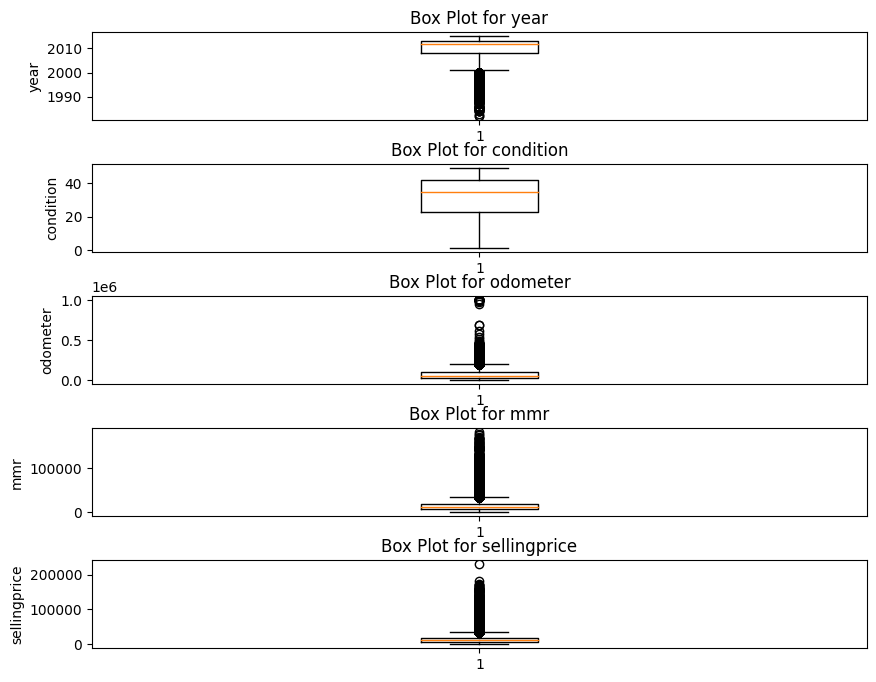

In [13]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()


In [14]:
df.shape

(546976, 16)

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
df.shape

<ipython-input-15-b475f557bd62>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-15-b475f557bd62>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-15-b475f557bd62>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(507821, 16)

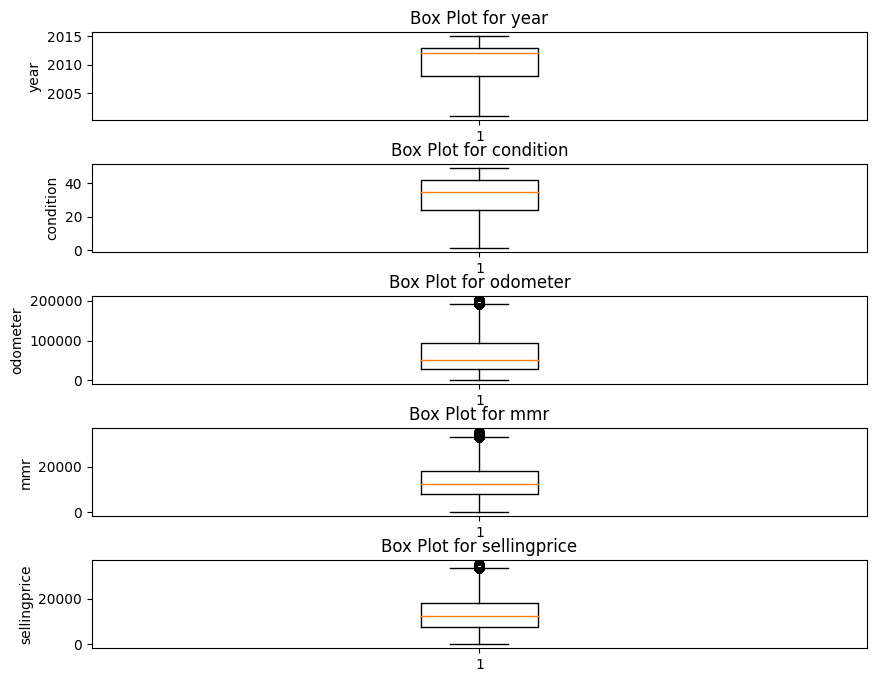

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column].dropna())
    axes[i].set_title(f'Box Plot for {column}')
    axes[i].set_ylabel(column)

plt.show()

In [17]:
# drop column yang tidak dibutuhkan
df.drop(columns=['saledate'], inplace=True)
df.drop(columns=['vin'], inplace=True)
df.drop(columns=['state'], inplace=True)
df.drop(columns=['seller'], inplace=True)
df.drop(columns=['make'], inplace=True)
df.drop(columns=['model'], inplace=True)
df.drop(columns=['trim'], inplace=True)
df.drop(columns=['body'], inplace=True)

### 2.5 EDA - Univariate Analysis

In [30]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
print(numerical_features)
print(categorical_features)

Index(['year', 'condition', 'odometer', 'mmr', 'sellingprice'], dtype='object')
Index(['transmission', 'color', 'interior'], dtype='object')


### 2.5.1 Categorical Fitur transmission

           jumlah sampel  persentase
automatic         492668        97.0
manual             15153         3.0


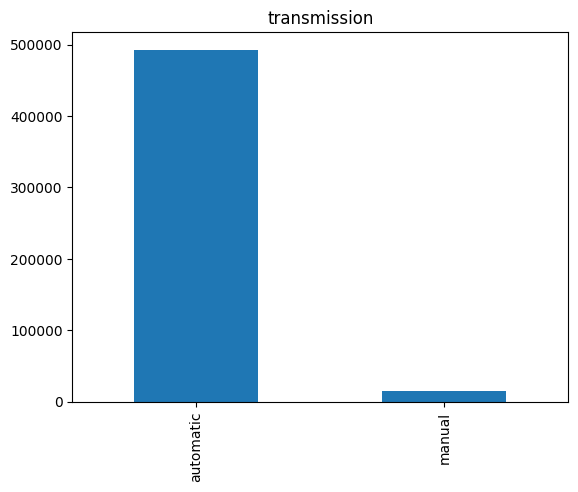

In [31]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
transmission = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(transmission)
count.plot(kind='bar', title=feature);

### 2.5.2 Categorical Fitur Color

           jumlah sampel  persentase
black             100128        19.7
white              96203        18.9
gray               77105        15.2
silver             77017        15.2
blue               46962         9.2
red                39921         7.9
—                  23134         4.6
gold                9498         1.9
green               8827         1.7
burgundy            8102         1.6
beige               7877         1.6
brown               6085         1.2
orange              1956         0.4
purple              1380         0.3
off-white           1330         0.3
yellow              1122         0.2
Other                480         0.1
charcoal             444         0.1
turquoise            199         0.0
pink                  39         0.0
lime                  12         0.0


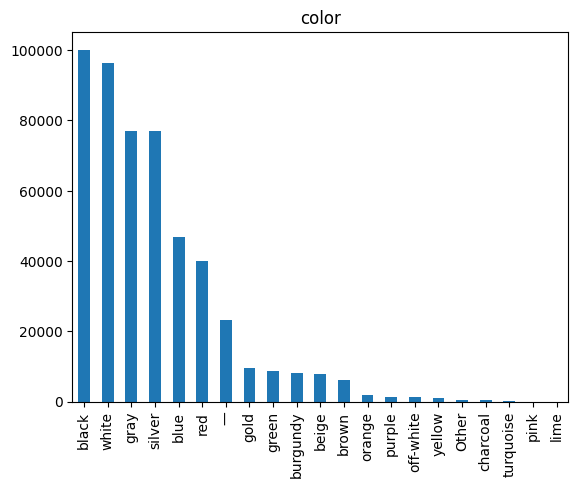

In [32]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
color = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(color)
count.plot(kind='bar', title=feature);

### 2.5.3 Categorical Fitur Interior

           jumlah sampel  persentase
black             230082        45.3
gray              163624        32.2
beige              54193        10.7
tan                38534         7.6
—                  10073         2.0
brown               6884         1.4
silver              1007         0.2
red                 1002         0.2
blue                 727         0.1
off-white            413         0.1
gold                 297         0.1
purple               283         0.1
white                213         0.0
green                210         0.0
burgundy             139         0.0
orange               126         0.0
yellow                14         0.0


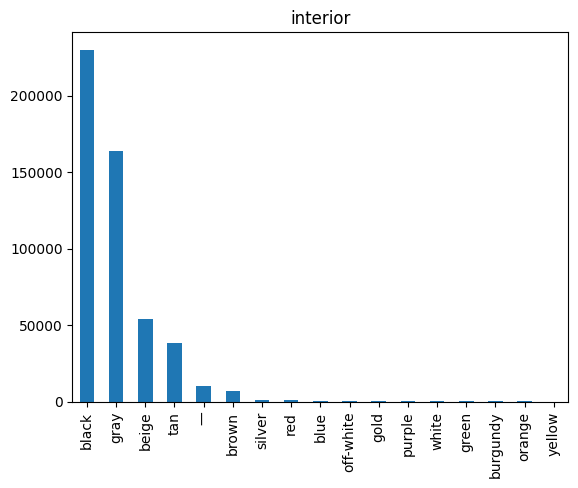

In [33]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
interior = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(interior)
count.plot(kind='bar', title=feature);

### 2.5.8 Numerical Features

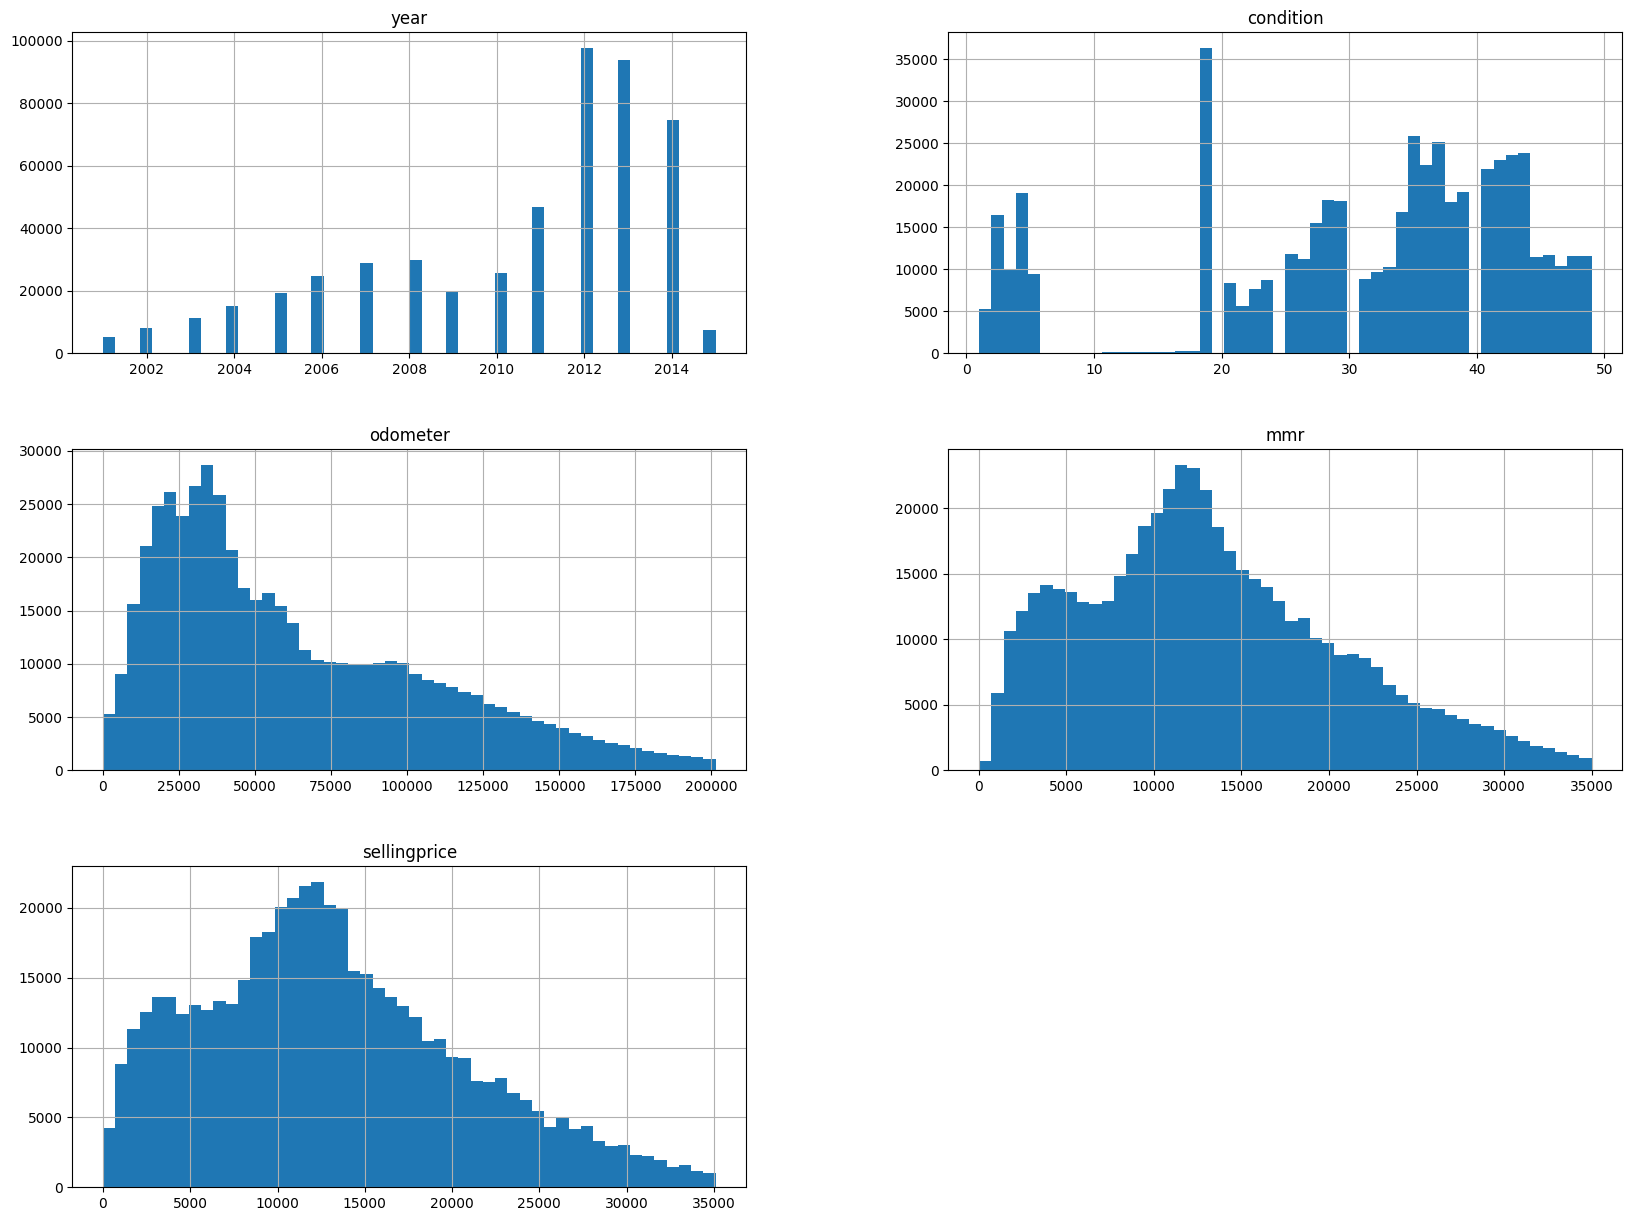

In [25]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### 2.6 EDA - Multivariate Analysis

Categorical Features

<ipython-input-26-5e896528991d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="sellingprice", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-26-5e896528991d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="sellingprice", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipython-input-26-5e896528991d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="sellingprice", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
<ipy

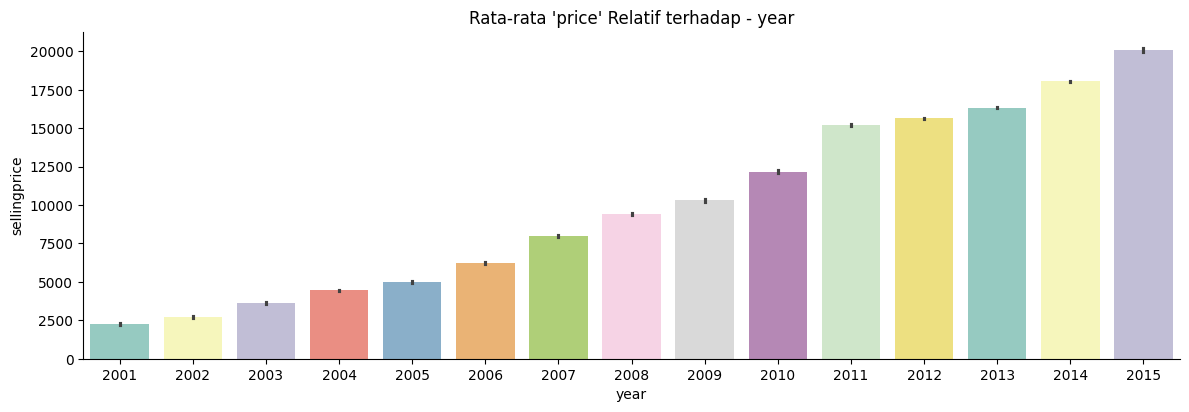

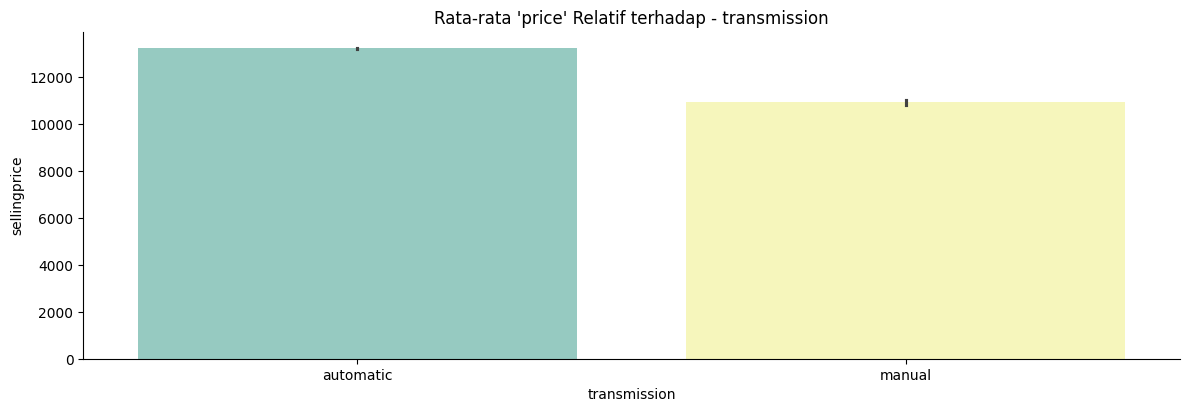

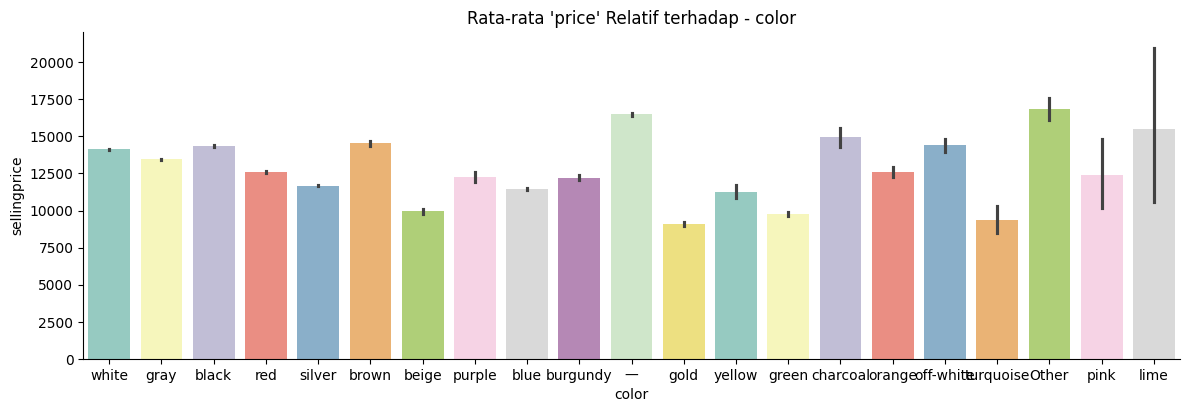

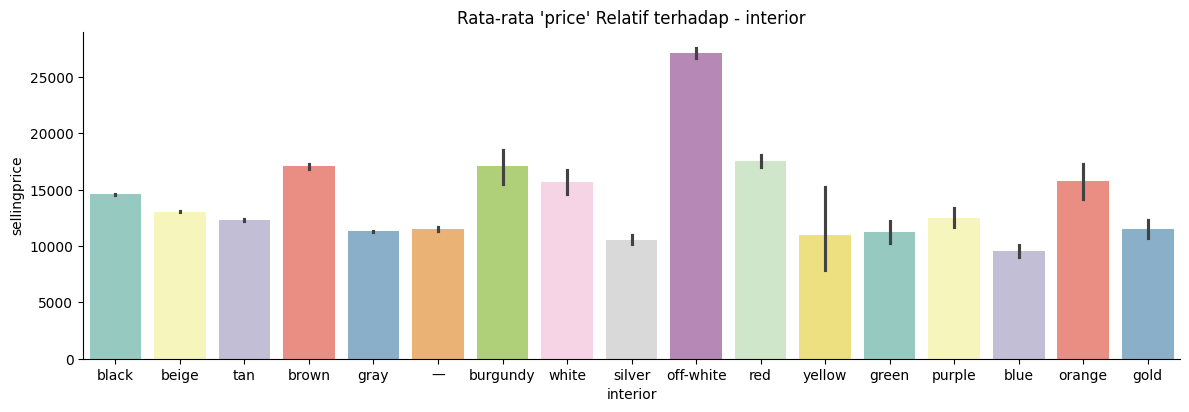

In [26]:
cat_features = df.select_dtypes(include=['object', 'int64']).columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="sellingprice", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Numerical Features

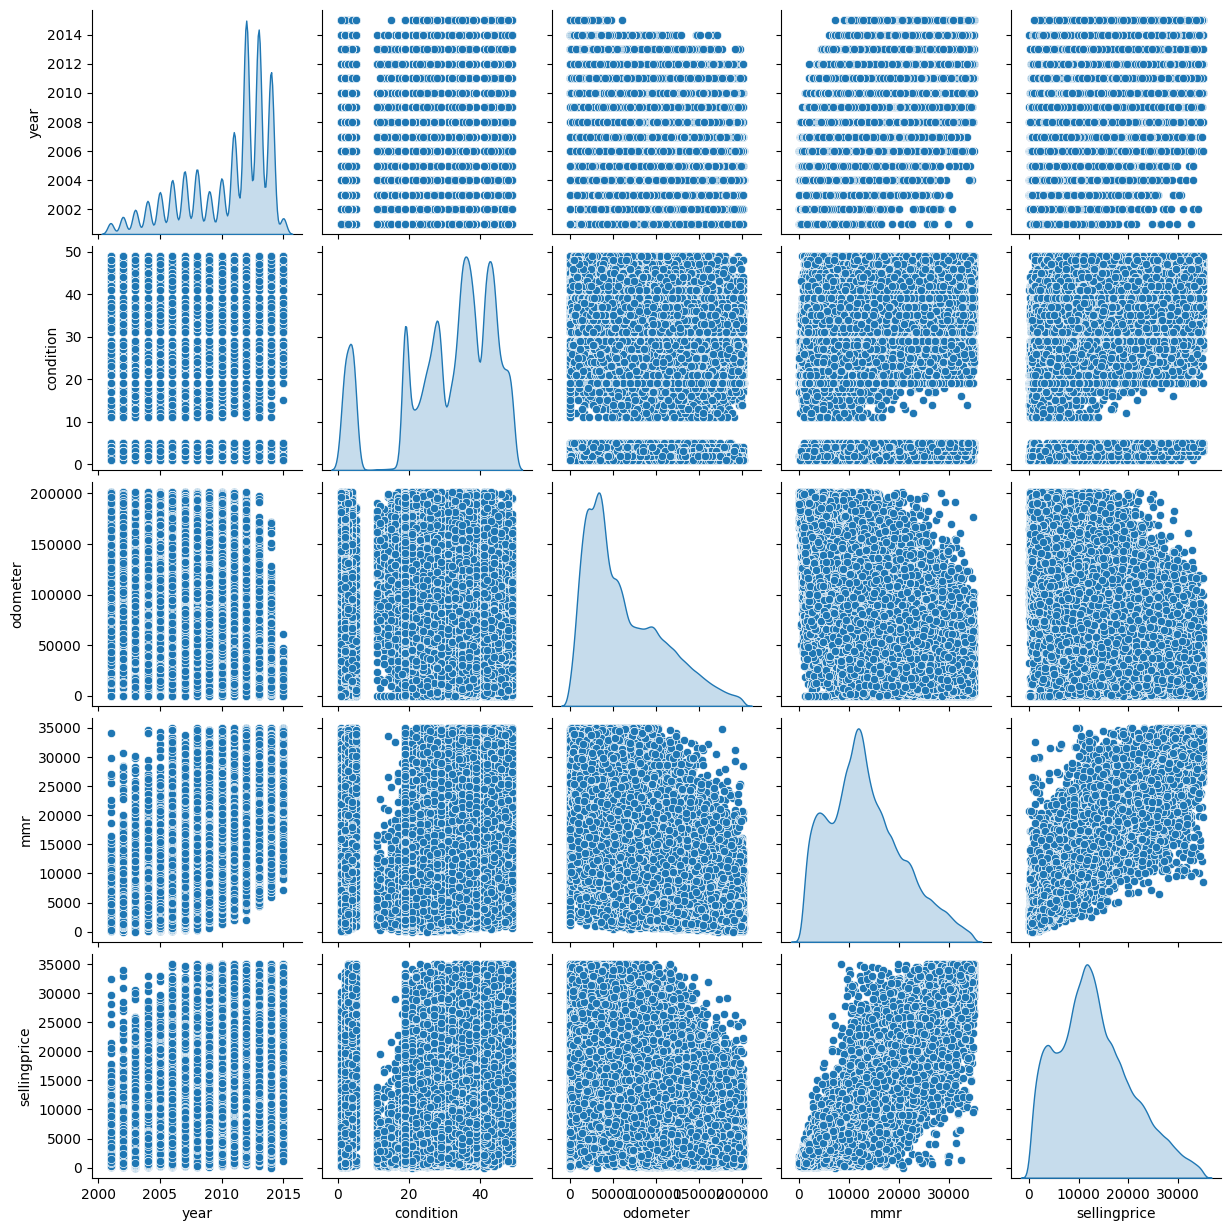

In [28]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-36-dd7c683ece04>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

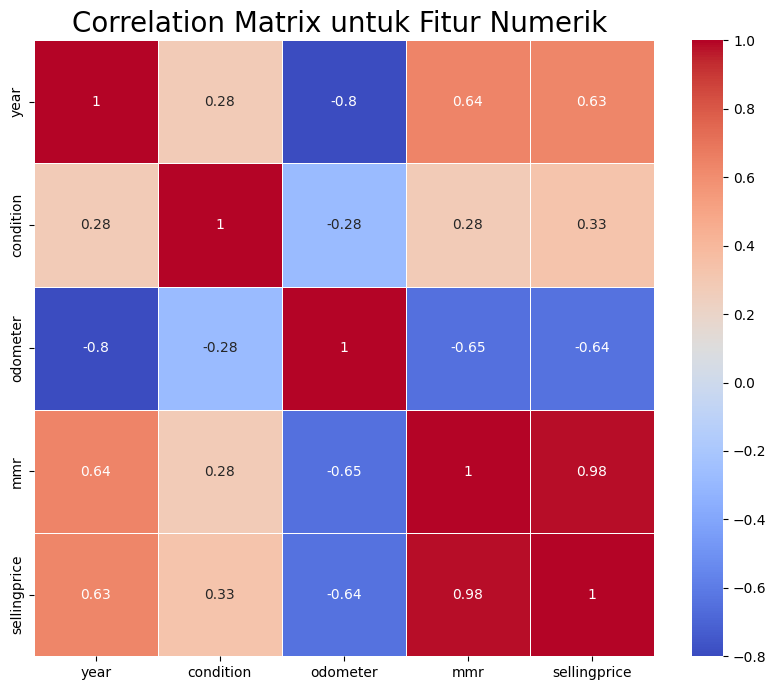

In [36]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [37]:
df.drop(['year','condition','odometer'], inplace=True, axis=1)
df.head()

,transmission,color,interior,mmr,sellingprice
0,automatic,white,black,20500.0,21500.0
1,automatic,white,beige,20800.0,21500.0
2,automatic,gray,black,31900.0,30000.0
3,automatic,white,black,27500.0,27750.0
5,automatic,gray,black,15350.0,10900.0


## **3. Data Preparation**

### 3.1 Encoding Fitur Kategori

In [38]:
from sklearn.preprocessing import  OneHotEncoder
df = pd.concat([df, pd.get_dummies(df['transmission'], prefix='transmission')],axis=1)
df = pd.concat([df, pd.get_dummies(df['color'], prefix='color')],axis=1)
df = pd.concat([df, pd.get_dummies(df['interior'], prefix='interior')],axis=1)
df.drop(['transmission','color','interior'], axis=1, inplace=True)
df.head()

,mmr,sellingprice,transmission_automatic,transmission_manual,color_Other,color_beige,color_black,color_blue,color_brown,color_burgundy,...,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow,interior_—
0,20500.0,21500.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20800.0,21500.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,31900.0,30000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27500.0,27750.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15350.0,10900.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

X = df.drop(["sellingprice"],axis =1)
y = df["sellingprice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [41]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 507821
Total # of sample in train dataset: 406256
Total # of sample in test dataset: 101565


### 3.3 Standarisasi

In [42]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['mmr']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,mmr
352406,1.551811
148116,-0.335122
459069,-0.071357
340624,-1.542352
557194,-0.294542


In [43]:
X_train[numerical_features].describe().round(4)

,mmr
count,406256.0000
mean,0.0000
std,1.0000
min,-1.7994
25%,-0.7308
50%,-0.1187
75%,0.6253
max,2.9315


## **4. Model Development**

In [44]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest'])

### 4.1 K-Nearest Neighbor

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### 4.2 Random Forest

In [46]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## **5. Evaluasi Model**

In [47]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [48]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,2592.54216,2910.000098
RF,2374.072967,2694.664788


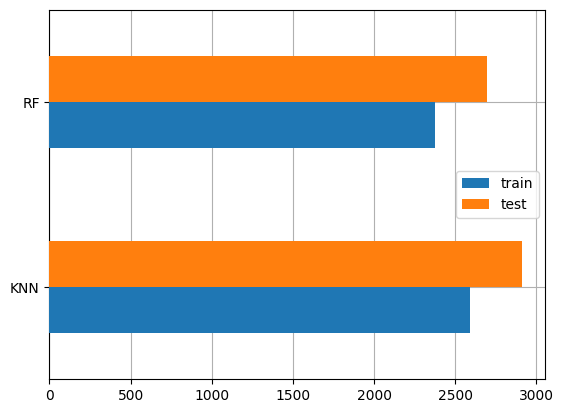

In [49]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [51]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF
157100,13200.0,13640.0,13430.3
